In [88]:
import pandas as pd
import numpy as np
from scipy import stats
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [172]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [173]:
df = pd.read_csv('diabetes.csv')

df.columns = ['Preg', 'Glu', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'A', 'Class']

features = df.drop(columns=['Class'])
y = df['Class']

In [174]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

LR: 0.776042 (0.050357)
LDA: 0.774727 (0.048422)
KNN: 0.736962 (0.036357)
CART: 0.688824 (0.048119)
NB: 0.748633 (0.051121)
SVM: 0.759159 (0.048690)


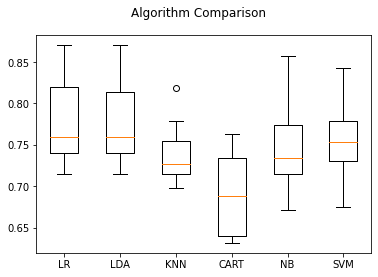

In [176]:
models = []
models.append(('LR', LogisticRegression(max_iter =1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(max_iter =1000)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

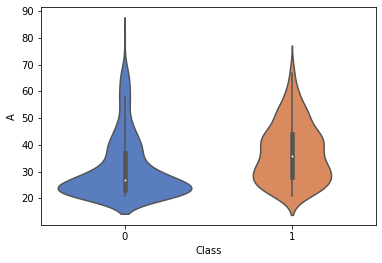

In [96]:
ax = sns.violinplot(x='Class', y='A', data=df, palette='muted', split=True)

In [90]:
df = pd.read_csv('diabetes.csv')

df[list(df.columns)[:-1]] = df[list(df.columns)[:-1]].replace(0, np.NaN)
df[list(df.columns)[:-1]] = pd.DataFrame(IterativeImputer(max_iter=10, random_state=0).fit_transform(df[list(df.columns)[:-1]]), columns=df[list(df.columns)[:-1]].columns)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,220.156268,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.000000,71.708223,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,21.272711,264.559960,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,4.228723,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0
764,2.000000,122.0,70.0,27.000000,160.705646,36.8,0.340,27.0,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0
766,1.000000,126.0,60.0,28.201450,178.033117,30.1,0.349,47.0,1


In [91]:
df.loc[:,'N1']=0
df.loc[(df['Age']<=30) & (df['Glucose']<=120),'N1']=1
df.loc[:,'N2']=0
df.loc[(df['BMI']<=30),'N2']=1
df.loc[:,'N3']=0
df.loc[(df['Age']<=30) & (df['Pregnancies']<=6),'N3']=1
df.loc[:,'N4']=0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'N4']=1
df.loc[:,'N5']=0
df.loc[(df['SkinThickness']<=20) ,'N5']=1
df.loc[:,'N6']=0
df.loc[(df['BMI']<30) & (df['SkinThickness']<=20),'N6']=1
df.loc[:,'N7']=0
df.loc[(df['Glucose']<=105) & (df['BMI']<=30),'N7']=1
df.loc[:,'N9']=0
df.loc[(df['Insulin']<200),'N9']=1
df.loc[:,'N10']=0
df.loc[(df['BloodPressure']<80),'N10']=1
df.loc[:,'N11']=0
df.loc[(df['Pregnancies']<4) & (df['Pregnancies']!=0) ,'N11']=1
df['N0'] = df['BMI'] * df['SkinThickness']

df['N8'] =  df['Pregnancies'] / df['Age']

df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']

df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']

df['N14'] = df['Age'] / df['Insulin']

df.loc[:,'N15']=0
df.loc[(df['N0']<1034) ,'N15']=1

target_col = ["Outcome"]
cat_cols   = df.nunique()[df.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [95]:
param = {'criterion': ['gini', 'entropy'],
         'max_depth': [1, 2, 3, 4, 5, 6, 7],
         'min_samples_split': [2, 3, 4],
         'class_weight': [None, 'balanced']}

clf = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param, n_iter=100, scoring='accuracy', n_jobs=-1, cv=5, random_state=0)
search = clf.fit(X, y)
search.best_params_

{'min_samples_split': 2,
 'max_depth': 4,
 'criterion': 'entropy',
 'class_weight': None}

In [143]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

model = DecisionTreeClassifier(**search.best_params_)

scores = []
for train_index , test_index in kfold.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    # outlier_filter = (np.abs(stats.zscore(X_train)) < 3).all(axis=1)
    # X_train = X_train[outlier_filter]
    # y_train = y_train[outlier_filter]
    # X_train, y_train = ADASYN(random_state=0, sampling_strategy={0: 10000, 1:10000}).fit_resample(X_train, y_train)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
    # plt.show()
    scores.append(accuracy_score(y_test, y_pred) * 100)

np.mean(scores), np.std(scores)

(76.29528366370474, 4.144006100570982)

In [112]:
import lightgbm as lgbm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

random_state=0

fit_params = {"early_stopping_rounds" : 100, 
             "eval_metric" : 'auc', 
             "eval_set" : [(X, y)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 300

#intialize lgbm and lunch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=-1)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=10,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **fit_params)
opt_parameters =  grid_search.best_params_
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)

opt_parameters

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


{'colsample_bytree': 0.9774461647652988,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 128,
 'min_child_weight': 0.001,
 'n_estimators': 600,
 'num_leaves': 31,
 'reg_alpha': 7,
 'reg_lambda': 1,
 'subsample': 0.32980144821712076}

In [128]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

model = lgbm.LGBMClassifier(
    colsample_bytree= 0.9774461647652988,
    learning_rate= 0.1,
    max_depth= 5,
    min_child_samples= 128,
    min_child_weight= 0.001,
    n_estimators= 600,
    num_leaves= 31,
    reg_alpha= 7,
    reg_lambda= 1,
    subsample= 0.32980144821712076)

scores = []
for train_index , test_index in kfold.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    # outlier_filter = (np.abs(stats.zscore(X_train)) < 3).all(axis=1)
    # X_train = X_train[outlier_filter]
    # y_train = y_train[outlier_filter]
    X_train, y_train = ADASYN(random_state=0).fit_resample(X_train, y_train)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
    # plt.show()
    scores.append(accuracy_score(y_test, y_pred) * 100)

np.mean(scores), np.std(scores)

(76.03725222146275, 4.933069629279677)